In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Read CSV into a DataFrame
csv_path = "SHR76_17.csv"
murder_df = pd.read_csv(csv_path)
murder_df.head()

,ID,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,Month,...,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,fstate,MSA
0,197601001AKASP00,"Juneau, AK",AKASP00,Alaska,State Troopers,Primary state LE,FBI,Yes,1976,January,...,Unknown or not reported,Knife or cutting instrument,Husband,Other arguments,NaN,0,0,30180.0,Alaska,Rural Alaska
1,197601001AL00102,"Jefferson, AL",AL00102,Alabama,Birmingham,Municipal police,FBI,Yes,1976,January,...,Unknown or not reported,Shotgun,Acquaintance,Felon killed by private citizen,Felon killed in commission of a crime,0,0,30180.0,Alabama,"Birmingham-Hoover, AL"
2,197601001AL00104,"Jefferson, AL",AL00104,Alabama,Fairfield,Municipal police,FBI,Yes,1976,January,...,Unknown or not reported,Shotgun,Wife,Other,NaN,0,0,30180.0,Alabama,"Birmingham-Hoover, AL"
3,197601001AL00106,"Jefferson, AL",AL00106,Alabama,Leeds,Municipal police,FBI,Yes,1976,January,...,Unknown or not reported,Knife or cutting instrument,Brother,Other arguments,NaN,0,0,30180.0,Alabama,"Birmingham-Hoover, AL"
4,197601001AL00201,"Mobile, AL",AL00201,Alabama,Mobile,Municipal police,FBI,Yes,1976,January,...,Unknown or not reported,Strangulation - hanging,Acquaintance,Circumstances undetermined,NaN,0,0,30180.0,Alabama,"Mobile, AL"


# Clean data up!

In [4]:
# Combine Gun categories
murder_weapons_series = murder_df['Weapon']
murder_weapons_series = murder_weapons_series.replace(to_replace=['Rifle', 'Handgun', 'Handgun - pistol, revolver, etc', 'Firearm, type not stated','Firearm', 'Shotgun', 'Other gun'], value='Gun')
murder_df = murder_df.assign(Weapon=murder_weapons_series)

# Combine Circumstances
murder_circumstance_series = murder_df['Circumstance']
murder_circumstance_series = murder_circumstance_series.replace(to_replace=['Other arguments', 'Argument over money or property'], value='Arguments')
murder_circumstance_series = murder_circumstance_series.replace(to_replace=['Other negligent handling of gun', 'Children playing with gun', 'Gun-cleaning death - other than self', 'Victim shot in hunting accident', 'All other manslaughter by negligence'], value='Negligence')
murder_circumstance_series = murder_circumstance_series.replace(to_replace=['Rape', 'Other sex offense'], value='Sex Offense')
murder_circumstance_series = murder_circumstance_series.replace(to_replace=['Circumstances undetermined', 'Other', 'Other - not specified', 'All suspected felony type'], value='Other')
murder_circumstance_series = murder_circumstance_series.replace(to_replace=['Robbery', 'Burglary', 'Motor vehicle theft', 'Larceny'], value='Theft')
murder_circumstance_series = murder_circumstance_series.replace(to_replace=['Brawl due to influence of alcohol', 'Brawl due to influence of narcotics', 'Narcotic drug laws'], value='Drug & Alcohol Related')
murder_circumstance_series = murder_circumstance_series.replace(to_replace=['Gangland killings', 'Juvenile gang killings'], value='Gang Related')
murder_df = murder_df.assign(Circumstance=murder_circumstance_series)

# Combine similar Relationships
murder_relationship_series = murder_df['Relationship']
murder_relationship_series = murder_relationship_series.replace(to_replace=['Husband', 'Wife', 'Common-law husband', 'Common-law wife'], value='Spouse')
murder_relationship_series = murder_relationship_series.replace(to_replace=['Brother', 'Sister'], value='Sibling')
murder_relationship_series = murder_relationship_series.replace(to_replace=['Mother', 'Father'], value='Parent')
murder_relationship_series = murder_relationship_series.replace(to_replace=['Ex-husband', 'Ex-wife'], value='Ex')
murder_relationship_series = murder_relationship_series.replace(to_replace=['Stepmother', 'Stepfather'], value='Stepparent')
murder_relationship_series = murder_relationship_series.replace(to_replace=['Stepdaughter', 'Stepson'], value='Stepchild')
murder_relationship_series = murder_relationship_series.replace(to_replace=['Boyfriend', 'Girlfriend'], value='Partner')
murder_relationship_series = murder_relationship_series.replace(to_replace=['Relationship not determined', 'Other - known to victim'], value='Other')
murder_df = murder_df.assign(Relationship=murder_relationship_series)

murder_off_age_series = murder_df['OffAge']
murder_off_age_series = murder_off_age_series.replace(to_replace=[0], value=999)
murder_df = murder_df.assign(OffAge=murder_off_age_series)

murder_df.head()

,ID,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,Month,...,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,fstate,MSA
0,197601001AKASP00,"Juneau, AK",AKASP00,Alaska,State Troopers,Primary state LE,FBI,Yes,1976,January,...,Unknown or not reported,Knife or cutting instrument,Spouse,Arguments,NaN,0,0,30180.0,Alaska,Rural Alaska
1,197601001AL00102,"Jefferson, AL",AL00102,Alabama,Birmingham,Municipal police,FBI,Yes,1976,January,...,Unknown or not reported,Gun,Acquaintance,Felon killed by private citizen,Felon killed in commission of a crime,0,0,30180.0,Alabama,"Birmingham-Hoover, AL"
2,197601001AL00104,"Jefferson, AL",AL00104,Alabama,Fairfield,Municipal police,FBI,Yes,1976,January,...,Unknown or not reported,Gun,Spouse,Other,NaN,0,0,30180.0,Alabama,"Birmingham-Hoover, AL"
3,197601001AL00106,"Jefferson, AL",AL00106,Alabama,Leeds,Municipal police,FBI,Yes,1976,January,...,Unknown or not reported,Knife or cutting instrument,Sibling,Arguments,NaN,0,0,30180.0,Alabama,"Birmingham-Hoover, AL"
4,197601001AL00201,"Mobile, AL",AL00201,Alabama,Mobile,Municipal police,FBI,Yes,1976,January,...,Unknown or not reported,Strangulation - hanging,Acquaintance,Other,NaN,0,0,30180.0,Alabama,"Mobile, AL"


# What is the correlation between weapons used and location, race, and age?

### Weapon Analysis Findings
* The most commonly used murder weapons across all murder types is guns.
* Guns have been the most used murder weapons since the beginning of this data set in 1976.
* Motor Vehicles are consistently not popular as a use for murder in FBI investigated incidents.
* Young Adults commit the most murders and they also utilize beating and strangulation moreso than other age groups.
* Murders are least likely to occur in Mountain states, although this could be due to population size in this region.
* The majority of murders occur in South Central and the East Coast.
* Black and White people commit the most murder.
* The only group to deviate from gun use as the most popular, Native Hawaiians and Pacific Islanders prefer knives to commit murders.
* White people are more likely to kill by asphyxiation than black people.
* White victims are more likely to be killed by other weapons than guns compared to black people. Notably, Strangulation, Narcotics (sleeping pills), knives, and poison were all used more frequently against white victims.

In [5]:
# murder_df['OffAge_Sort'] = np.where(murder_df.OffAge == 0, 999, murder_df.OffAge)

# rename data set
age_df = murder_df

# Create age bins
bins = [0, 3, 12, 17, 29, 44, 59, 998, 1000]

# Create the names for the age bins
group_names = ["Baby", "Child", "Teenager", "Young Adult", "Adult", "Middle Age", "Old Adult", "Unknown"]

#add age groups
age_df["Off_Age_Group"] = pd.cut(age_df["OffAge"], bins, labels=group_names)

age_df['Off_Age_Group'].value_counts()

Unknown        256608
Young Adult    247050
Adult          151805
Middle Age      55671
Teenager        38563
Old Adult       19912
Child            1387
Baby               29
Name: Off_Age_Group, dtype: int64

In [6]:
#group by age group name
age_group = age_df.groupby("Off_Age_Group")
# Count weapons by age group
weapon_counts = pd.DataFrame(age_group["Weapon"].value_counts())
# #rename count column
weapon_counts = weapon_counts.rename(columns={"Weapon": "Weapon Count"})
weapon_counts

Weapon Count
Off_Age_Group Weapon                                          
Baby          Gun                                           25
              Fire                                           2
              Blunt object - hammer, club, etc               1
              Personal weapons, includes beating             1
Child         Gun                                          919
...                                                        ...
Unknown       Narcotics or drugs, sleeping pills           303
              Drowning                                     289
              Explosives                                   183
              Poison - does not include gas                108
              Pushed or thrown out window                   38

[94 rows x 1 columns]

In [7]:
#pivot by age group
age_pivot = weapon_counts.pivot_table(index= "Off_Age_Group", columns= "Weapon", values='Weapon Count')
age_pivot.head()
age_pivot.fillna(0,inplace=True)

# weapon_df['max'] =
maxes = age_pivot.idxmax(axis=1)

mins = age_pivot.idxmin(axis=1)

age_pivot['min'] = mins
age_pivot['max'] = maxes

age_pivot.head()

Weapon,Asphyxiation - includes death by gas,"Blunt object - hammer, club, etc",Drowning,Explosives,Fire,Gun,Knife or cutting instrument,Motor Vehicle/Vessel,"Narcotics or drugs, sleeping pills",Other or type unknown,"Personal weapons, includes beating",Poison - does not include gas,Pushed or thrown out window,Strangulation - hanging,min,max
Off_Age_Group,,,,,,,,,,,,,,,,
Baby,0.0,1.0,0.0,0.0,2.0,25.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Asphyxiation - includes death by gas,Gun
Child,20.0,53.0,15.0,2.0,96.0,919.0,118.0,0.0,0.0,32.0,123.0,0.0,3.0,6.0,Motor Vehicle/Vessel,Gun
Teenager,245.0,1593.0,96.0,27.0,384.0,27006.0,5861.0,0.0,47.0,1116.0,1930.0,16.0,15.0,227.0,Motor Vehicle/Vessel,Gun
Young Adult,1580.0,10726.0,654.0,255.0,2061.0,157614.0,41298.0,1.0,701.0,9927.0,19484.0,126.0,86.0,2537.0,Motor Vehicle/Vessel,Gun
Adult,1180.0,7497.0,360.0,102.0,1693.0,91423.0,29014.0,0.0,765.0,6908.0,10738.0,180.0,77.0,1868.0,Motor Vehicle/Vessel,Gun


In [8]:
#most and least popular view
age_pivot[["min", "max"]]

Weapon,min,max
Off_Age_Group,,
Baby,Asphyxiation - includes death by gas,Gun
Child,Motor Vehicle/Vessel,Gun
Teenager,Motor Vehicle/Vessel,Gun
Young Adult,Motor Vehicle/Vessel,Gun
Adult,Motor Vehicle/Vessel,Gun
Middle Age,Motor Vehicle/Vessel,Gun
Old Adult,Motor Vehicle/Vessel,Gun
Unknown,Motor Vehicle/Vessel,Gun


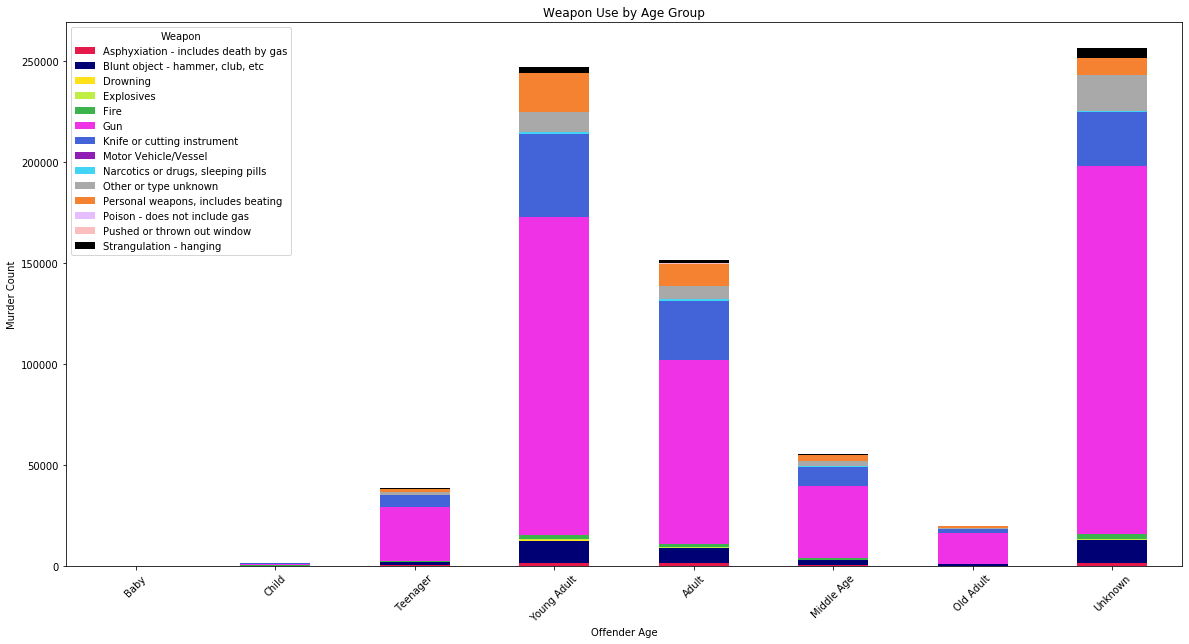

In [9]:
#set colors for chart
colors = ['#E6194B', '#000075', '#FFE119', '#BFEF45', '#3CB44B', '#F032E6', '#4363D8', '#911EB4', '#42D4F4', '#A9A9A9', '#F58231', '#E6BEFF', '#FABEBE', '#000000', '#808000']

#create stacked chart
age_pivot.loc[:,['Asphyxiation - includes death by gas', 'Blunt object - hammer, club, etc',
                'Drowning', 'Explosives', 'Fire', 'Gun', 'Knife or cutting instrument',
                'Motor Vehicle/Vessel', 'Narcotics or drugs, sleeping pills', 'Other or type unknown',
                 'Personal weapons, includes beating', 'Poison - does not include gas',
                'Pushed or thrown out window', 'Strangulation - hanging']].plot.bar(stacked=True, color=colors, figsize=(20,10))
#label chart
plt.xlabel('Offender Age')
plt.xticks(rotation=45)
plt.ylabel('Murder Count')
plt.title("Weapon Use by Age Group")
#show chart
plt.show()

### Weapon by Location

In [10]:
#combine states into regions using https://en.wikipedia.org/wiki/List_of_regions_of_the_United_States
by_state_regions = murder_df["State"]
by_state_regions = by_state_regions.replace(to_replace=['Connecticut','Maine','Massachusetts',
                                                        'New Hampshire','Rhodes Island','Vermont',
                                                        'New Jersey','New York','Pennsylvania'], value='Northeast')
by_state_regions = by_state_regions.replace(to_replace=['Illinois','Indiana','Michigan','Ohio',
                                                        'Wisconsin','Iowa','Kansas','Minnesota',
                                                        'Missouri','Nebraska','North Dakota',
                                                        'South Dakota'], value='Midwest')
by_state_regions = by_state_regions.replace(to_replace=['Delaware','Florida','Georgia','Maryland',
                                                        'North Carolina','South Carolina','Virginia',
                                                        'District of Columbia','West Virginia'], value='East Coast')
by_state_regions = by_state_regions.replace(to_replace=[ 'Alabama','Kentucky','Mississippi','Tennessee',
                                                        'Arkansas','Louisiana','Oklahoma','Texas'], value='South Central')
by_state_regions = by_state_regions.replace(to_replace=['Arizona','Colorado','Idaho','Montana','Nevada',
                                                        'New Mexico','Utah','Wyoming'], value='Mountain')
by_state_regions = by_state_regions.replace(to_replace=['California','Oregon','Washington','Alaska','Hawaii'], value='Pacific')
by_state_df = murder_df.assign(Region=by_state_regions)

In [11]:
#check that the column creation worked
by_state_df.head()

,ID,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,Month,...,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,fstate,MSA,Off_Age_Group,Region
0,197601001AKASP00,"Juneau, AK",AKASP00,Alaska,State Troopers,Primary state LE,FBI,Yes,1976,January,...,Spouse,Arguments,NaN,0,0,30180.0,Alaska,Rural Alaska,Middle Age,Pacific
1,197601001AL00102,"Jefferson, AL",AL00102,Alabama,Birmingham,Municipal police,FBI,Yes,1976,January,...,Acquaintance,Felon killed by private citizen,Felon killed in commission of a crime,0,0,30180.0,Alabama,"Birmingham-Hoover, AL",Old Adult,South Central
2,197601001AL00104,"Jefferson, AL",AL00104,Alabama,Fairfield,Municipal police,FBI,Yes,1976,January,...,Spouse,Other,NaN,0,0,30180.0,Alabama,"Birmingham-Hoover, AL",Middle Age,South Central
3,197601001AL00106,"Jefferson, AL",AL00106,Alabama,Leeds,Municipal police,FBI,Yes,1976,January,...,Sibling,Arguments,NaN,0,0,30180.0,Alabama,"Birmingham-Hoover, AL",Adult,South Central
4,197601001AL00201,"Mobile, AL",AL00201,Alabama,Mobile,Municipal police,FBI,Yes,1976,January,...,Acquaintance,Other,NaN,0,0,30180.0,Alabama,"Mobile, AL",Young Adult,South Central


In [12]:
#group by region name
regions = by_state_df.groupby("Region")
# Count weapons by region
weapons_byregion = pd.DataFrame(regions["Weapon"].value_counts())
#rename count column
weapons_byregion = weapons_byregion.rename(
    columns={"Weapon": "Weapon Count"})
weapons_byregion

Weapon Count
Region        Weapon                                          
East Coast    Gun                                       109191
              Knife or cutting instrument                22268
              Other or type unknown                      10781
              Personal weapons, includes beating          8767
              Blunt object - hammer, club, etc            6584
...                                                        ...
South Central Drowning                                     310
              Narcotics or drugs, sleeping pills           281
              Explosives                                   205
              Poison - does not include gas                101
              Pushed or thrown out window                   28

[79 rows x 1 columns]

In [13]:
#pivot by region
region_pivot = weapons_byregion.pivot_table(index= "Region", columns= "Weapon", values='Weapon Count')
region_pivot.fillna(0,inplace=True)
# most and least popular weapons
region_maxes = region_pivot.idxmax(axis=1)
region_mins = region_pivot.idxmin(axis=1)
#add columns
region_pivot['min'] = region_mins
region_pivot['max'] = region_maxes
region_pivot.head()

Weapon,Asphyxiation - includes death by gas,"Blunt object - hammer, club, etc",Drowning,Explosives,Fire,Gun,Knife or cutting instrument,Motor Vehicle/Vessel,"Narcotics or drugs, sleeping pills",Other or type unknown,"Personal weapons, includes beating",Poison - does not include gas,Pushed or thrown out window,Strangulation - hanging,min,max
Region,,,,,,,,,,,,,,,,
East Coast,698.0,6584.0,240.0,53.0,1270.0,109191.0,22268.0,0.0,431.0,10781.0,8767.0,88.0,37.0,1401.0,Motor Vehicle/Vessel,Gun
Midwest,1054.0,6471.0,254.0,131.0,1789.0,97092.0,19120.0,0.0,619.0,8201.0,8302.0,118.0,66.0,2036.0,Motor Vehicle/Vessel,Gun
Mountain,388.0,2263.0,105.0,29.0,284.0,25009.0,6018.0,0.0,185.0,2298.0,2982.0,26.0,12.0,627.0,Motor Vehicle/Vessel,Gun
Northeast,783.0,5550.0,196.0,109.0,2253.0,73377.0,22799.0,1.0,281.0,5498.0,8834.0,100.0,83.0,1560.0,Motor Vehicle/Vessel,Gun
Pacific,1099.0,6997.0,370.0,76.0,976.0,88731.0,21222.0,0.0,390.0,4047.0,7747.0,110.0,25.0,2667.0,Motor Vehicle/Vessel,Gun


In [14]:
#view most and least popular weapons by region
region_pivot[["min","max"]]

Weapon,min,max
Region,,
East Coast,Motor Vehicle/Vessel,Gun
Midwest,Motor Vehicle/Vessel,Gun
Mountain,Motor Vehicle/Vessel,Gun
Northeast,Motor Vehicle/Vessel,Gun
Pacific,Motor Vehicle/Vessel,Gun
South Central,Motor Vehicle/Vessel,Gun


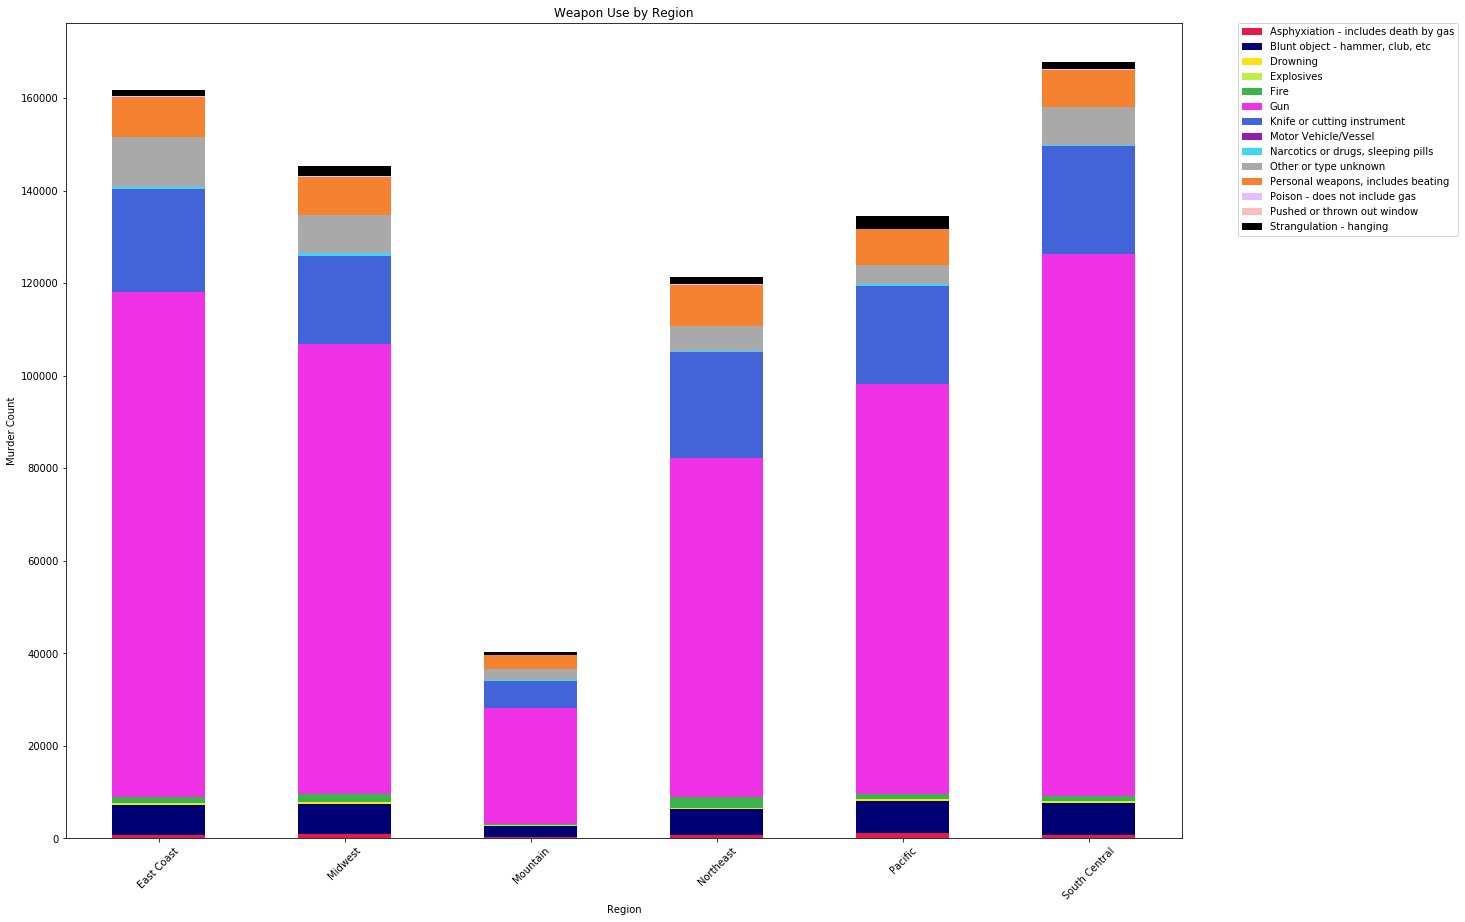

In [15]:
#create stacked chart
region_pivot.loc[:,['Asphyxiation - includes death by gas', 'Blunt object - hammer, club, etc',
                'Drowning', 'Explosives', 'Fire', 'Gun', 'Knife or cutting instrument',
                'Motor Vehicle/Vessel', 'Narcotics or drugs, sleeping pills', 'Other or type unknown',
                 'Personal weapons, includes beating', 'Poison - does not include gas',
                'Pushed or thrown out window', 'Strangulation - hanging']].plot.bar(stacked=True, color=colors, figsize=(20,15))
#label chart
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.ylabel('Murder Count')
plt.title("Weapon Use by Region")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#show chart
plt.show()

### Weapons by Race

In [16]:
race_df = murder_df

#group by offender race
race = race_df.groupby("OffRace")
# Count weapons by offender race
weapons_byrace = pd.DataFrame(race["Weapon"].value_counts())
#rename count column
weapons_byrace = weapons_byrace.rename(
    columns={"Weapon": "Weapon Count"})
weapons_byrace

Weapon Count
OffRace                           Weapon                                          
American Indian or Alaskan Native Gun                                         1798
                                  Knife or cutting instrument                 1295
                                  Personal weapons, includes beating           604
                                  Blunt object - hammer, club, etc             332
                                  Other or type unknown                        226
...                                                                            ...
White                             Narcotics or drugs, sleeping pills          1590
                                  Drowning                                     791
                                  Poison - does not include gas                348
                                  Explosives                                   327
                                  Pushed or thrown out window                  111

[70 rows x 1 columns]

In [17]:
#pivot by offender race
race_pivot = weapons_byrace.pivot_table(index= "OffRace", columns= "Weapon", values='Weapon Count')
race_pivot.fillna(0,inplace=True)

In [18]:
# most and least popular weapons
race_maxes = race_pivot.idxmax(axis=1)
race_mins = race_pivot.idxmin(axis=1)
#add columns
race_pivot['min'] = race_mins
race_pivot['max'] = race_maxes
race_pivot.head()

Weapon,Asphyxiation - includes death by gas,"Blunt object - hammer, club, etc",Drowning,Explosives,Fire,Gun,Knife or cutting instrument,Motor Vehicle/Vessel,"Narcotics or drugs, sleeping pills",Other or type unknown,"Personal weapons, includes beating",Poison - does not include gas,Pushed or thrown out window,Strangulation - hanging,min,max
OffRace,,,,,,,,,,,,,,,,
American Indian or Alaskan Native,54.0,332.0,22.0,0.0,51.0,1798.0,1295.0,0.0,20.0,226.0,604.0,3.0,2.0,59.0,Explosives,Gun
Asian,74.0,288.0,32.0,9.0,92.0,4116.0,1276.0,0.0,18.0,254.0,484.0,11.0,5.0,104.0,Motor Vehicle/Vessel,Gun
Black,1052.0,9808.0,342.0,78.0,2069.0,180450.0,43087.0,1.0,271.0,8183.0,14400.0,80.0,98.0,1794.0,Motor Vehicle/Vessel,Gun
Native Hawaiian or Pacific Islander,0.0,0.0,0.0,0.0,1.0,3.0,6.0,0.0,0.0,1.0,6.0,0.0,0.0,0.0,Asphyxiation - includes death by gas,Knife or cutting instrument
Unknown,1200.0,10960.0,288.0,189.0,2554.0,162773.0,25429.0,0.0,288.0,17319.0,8149.0,101.0,35.0,4629.0,Motor Vehicle/Vessel,Gun


In [19]:
#view most and least popular weapons by race
race_pivot[["min","max"]]

Weapon,min,max
OffRace,,
American Indian or Alaskan Native,Explosives,Gun
Asian,Motor Vehicle/Vessel,Gun
Black,Motor Vehicle/Vessel,Gun
Native Hawaiian or Pacific Islander,Asphyxiation - includes death by gas,Knife or cutting instrument
Unknown,Motor Vehicle/Vessel,Gun
White,Motor Vehicle/Vessel,Gun


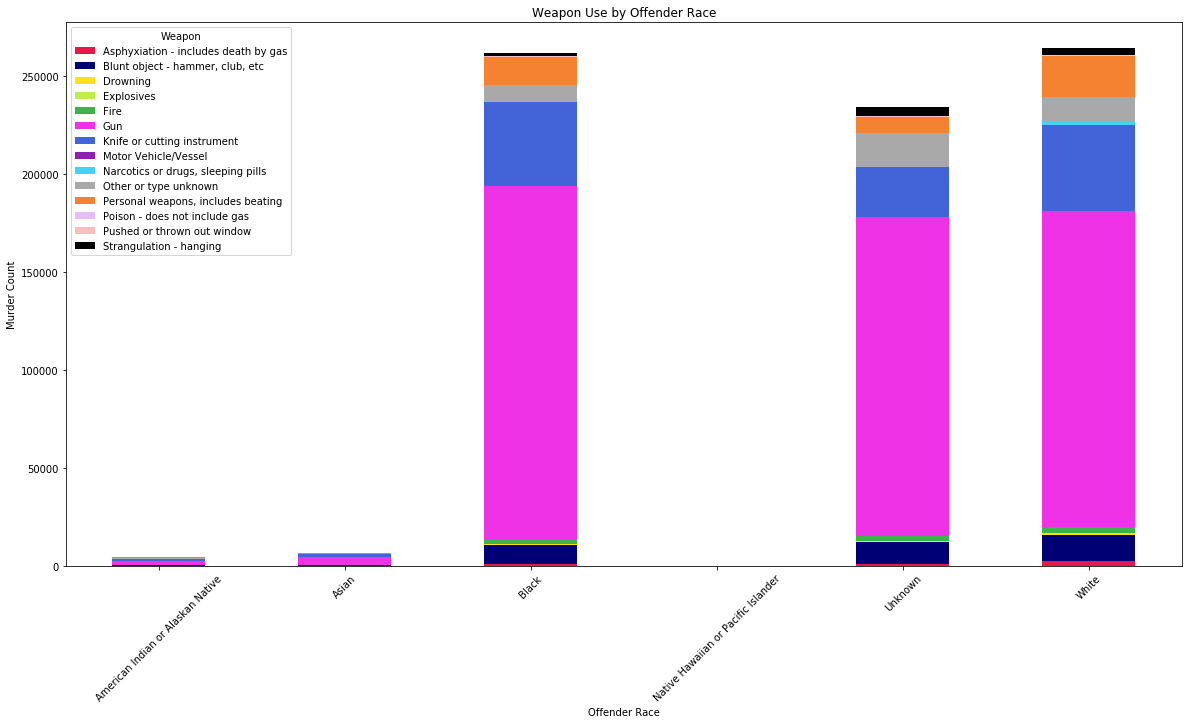

In [20]:
#create stacked chart
race_pivot.loc[:,['Asphyxiation - includes death by gas', 'Blunt object - hammer, club, etc',
                'Drowning', 'Explosives', 'Fire', 'Gun', 'Knife or cutting instrument',
                'Motor Vehicle/Vessel', 'Narcotics or drugs, sleeping pills', 'Other or type unknown',
                 'Personal weapons, includes beating', 'Poison - does not include gas',
                'Pushed or thrown out window', 'Strangulation - hanging']].plot.bar(stacked=True, color=colors, figsize=(20,10))
#label chart
plt.xlabel('Offender Race')
plt.xticks(rotation=45)
plt.ylabel('Murder Count')
plt.title("Weapon Use by Offender Race")
#show chart
plt.show()

In [21]:
#group by victim race
vic_race = race_df.groupby("VicRace")
# Count weapons by offender race
weapons_vicrace = pd.DataFrame(vic_race["Weapon"].value_counts())
#rename count column
weapons_vicrace = weapons_vicrace.rename(
    columns={"Weapon": "Weapon Count"})
weapons_vicrace

Weapon Count
VicRace                           Weapon                                          
American Indian or Alaskan Native Gun                                         2600
                                  Knife or cutting instrument                 1357
                                  Personal weapons, includes beating           633
                                  Blunt object - hammer, club, etc             432
                                  Other or type unknown                        389
...                                                                            ...
White                             Narcotics or drugs, sleeping pills          1890
                                  Drowning                                     966
                                  Explosives                                   425
                                  Poison - does not include gas                419
                                  Pushed or thrown out window                  138

[70 rows x 1 columns]

In [22]:
#pivot by victim race
vic_race_pivot = weapons_vicrace.pivot_table(index= "VicRace", columns= "Weapon", values='Weapon Count')
vic_race_pivot.fillna(0,inplace=True)
vic_race_pivot.head()

Weapon,Asphyxiation - includes death by gas,"Blunt object - hammer, club, etc",Drowning,Explosives,Fire,Gun,Knife or cutting instrument,Motor Vehicle/Vessel,"Narcotics or drugs, sleeping pills",Other or type unknown,"Personal weapons, includes beating",Poison - does not include gas,Pushed or thrown out window,Strangulation - hanging
VicRace,,,,,,,,,,,,,,
American Indian or Alaskan Native,58.0,432.0,26.0,2.0,75.0,2600.0,1357.0,0.0,20.0,389.0,633.0,3.0,5.0,80.0
Asian,116.0,595.0,39.0,13.0,148.0,6822.0,1797.0,0.0,21.0,521.0,735.0,14.0,8.0,220.0
Black,1226.0,11508.0,426.0,160.0,2874.0,265280.0,49433.0,1.0,232.0,13698.0,15027.0,97.0,100.0,3119.0
Native Hawaiian or Pacific Islander,0.0,0.0,0.0,0.0,1.0,13.0,4.0,0.0,0.0,3.0,7.0,0.0,0.0,0.0
Unknown,67.0,353.0,18.0,3.0,186.0,4581.0,1141.0,0.0,24.0,1408.0,449.0,10.0,0.0,133.0


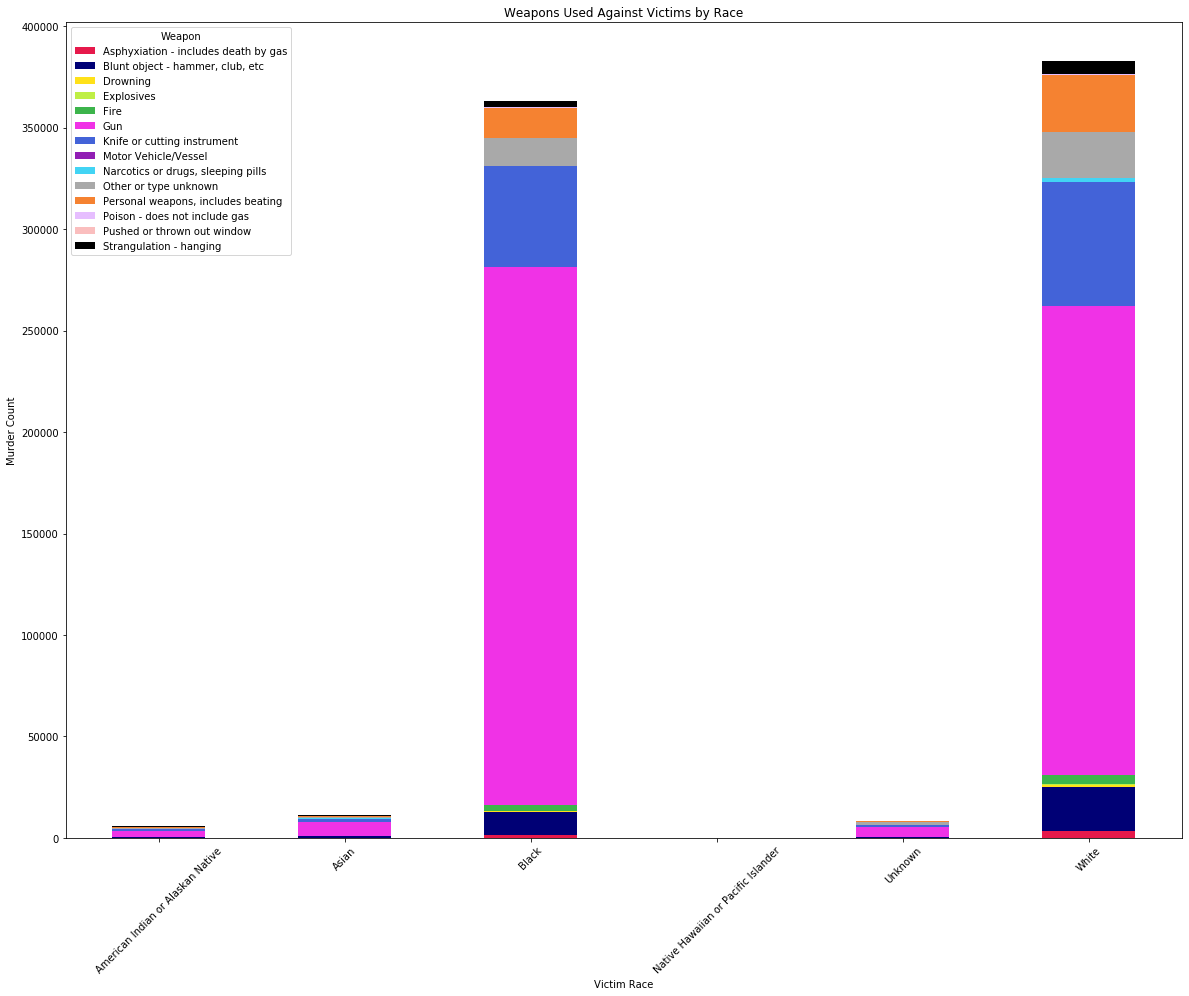

In [23]:
#create stacked chart
vic_race_pivot.loc[:,['Asphyxiation - includes death by gas', 'Blunt object - hammer, club, etc',
                'Drowning', 'Explosives', 'Fire', 'Gun', 'Knife or cutting instrument',
                'Motor Vehicle/Vessel', 'Narcotics or drugs, sleeping pills', 'Other or type unknown',
                 'Personal weapons, includes beating', 'Poison - does not include gas',
                'Pushed or thrown out window', 'Strangulation - hanging']].plot.bar(stacked=True, color=colors, figsize=(20,15))
#label chart
plt.xlabel('Victim Race')
plt.xticks(rotation=45)
plt.ylabel('Murder Count')
plt.title("Weapons Used Against Victims by Race")
#show chart
plt.show()

### Weapon by Year

In [24]:
year_df = murder_df

#group by year
year_df = year_df.groupby("Year")
# Count weapons by offender race
weapons_byyear = pd.DataFrame(year_df["Weapon"].value_counts())
#rename count column
weapons_byyear = weapons_byyear.rename(
    columns={"Weapon": "Weapon Count"})
weapons_byyear

Weapon Count
Year Weapon                                          
1976 Gun                                        11523
     Knife or cutting instrument                 2994
     Personal weapons, includes beating          1036
     Blunt object - hammer, club, etc             812
     Other or type unknown                        498
...                                               ...
2017 Poison - does not include gas                 19
     Drowning                                      14
     Pushed or thrown out window                    4
     Explosives                                     1
     Motor Vehicle/Vessel                           1

[546 rows x 1 columns]

In [25]:
#pivot by year
year_pivot = weapons_byyear.pivot_table(index= "Year", columns= "Weapon", values='Weapon Count')
year_pivot.fillna(0,inplace=True)

# most and least popular weapons
year_maxes = year_pivot.idxmax(axis=1)
year_mins = year_pivot.idxmin(axis=1)
#add columns
year_pivot['min'] = year_mins
year_pivot['max'] = year_maxes
year_pivot.head()

Weapon,Asphyxiation - includes death by gas,"Blunt object - hammer, club, etc",Drowning,Explosives,Fire,Gun,Knife or cutting instrument,Motor Vehicle/Vessel,"Narcotics or drugs, sleeping pills",Other or type unknown,"Personal weapons, includes beating",Poison - does not include gas,Pushed or thrown out window,Strangulation - hanging,min,max
Year,,,,,,,,,,,,,,,,
1976,58.0,812.0,51.0,31.0,231.0,11523.0,2994.0,0.0,68.0,498.0,1036.0,2.0,10.0,305.0,Motor Vehicle/Vessel,Gun
1977,134.0,858.0,60.0,16.0,281.0,11979.0,3460.0,0.0,41.0,542.0,1009.0,17.0,16.0,431.0,Motor Vehicle/Vessel,Gun
1978,95.0,900.0,47.0,7.0,259.0,12645.0,3556.0,0.0,21.0,531.0,1083.0,10.0,17.0,352.0,Motor Vehicle/Vessel,Gun
1979,106.0,1009.0,69.0,8.0,285.0,14027.0,4001.0,0.0,22.0,572.0,1173.0,13.0,11.0,402.0,Motor Vehicle/Vessel,Gun
1980,105.0,1105.0,50.0,22.0,297.0,14752.0,4255.0,0.0,14.0,765.0,1292.0,17.0,17.0,401.0,Motor Vehicle/Vessel,Gun


In [26]:
#most and least popular view
year_pivot[["min", "max"]]

Weapon,min,max
Year,,
1976,Motor Vehicle/Vessel,Gun
1977,Motor Vehicle/Vessel,Gun
1978,Motor Vehicle/Vessel,Gun
1979,Motor Vehicle/Vessel,Gun
1980,Motor Vehicle/Vessel,Gun
1981,Motor Vehicle/Vessel,Gun
1982,Motor Vehicle/Vessel,Gun
1983,Motor Vehicle/Vessel,Gun
1984,Motor Vehicle/Vessel,Gun


# What is the correlation between relationship type and type of murder committed?

* Arguments are the biggest specific circumstance for murder
* Acquaintances are the biggest specified perpetrators
* Most common weapon used, regardless of relationship, is a gun
* Homicide committed by progeny are mostly done with personal weapons (which includes beating)

In [27]:
circumstance_df = pd.crosstab(murder_df.Relationship, murder_df.Circumstance)
#Remove "Other" designation to get better detail on specific rlationships and circumstances
circumstance_df = circumstance_df.drop(["Other"], axis=1)
circumstance_df = circumstance_df.drop(["Other"], axis=0)
circumstance_df.head()

Circumstance,Abortion,Arguments,Arson,Child killed by babysitter,Drug & Alcohol Related,Felon killed by police,Felon killed by private citizen,Gambling,Gang Related,Institutional killings,Lovers triangle,Negligence,Prostitution and commercialized vice,Sex Offense,Sniper attack,Theft
Relationship,,,,,,,,,,,,,,,,
Acquaintance,2,70871,703,339,18222,170,1927,635,2353,368,4974,2093,159,1335,44,10523
Daughter,1,780,143,18,80,0,1,0,2,1,26,586,0,36,0,6
Employee,1,185,14,2,9,1,5,1,2,0,5,21,1,3,0,51
Employer,0,239,2,0,6,0,0,0,2,0,5,6,1,8,0,126
Ex,0,1692,7,0,48,3,50,0,1,2,160,11,0,5,1,42


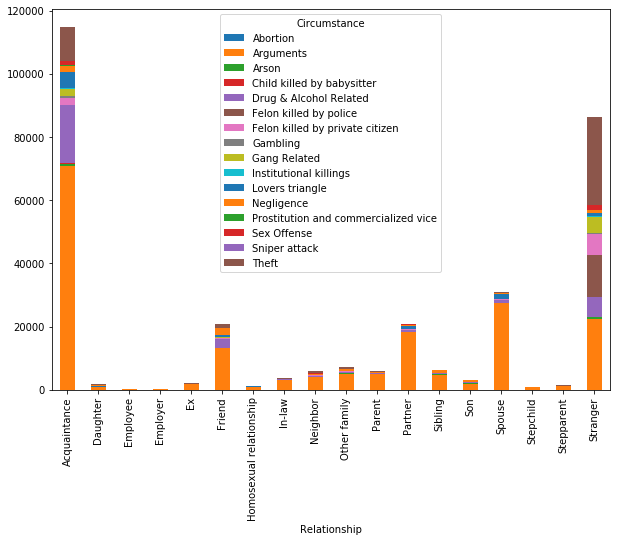

In [28]:
circumstance_df.plot.bar(stacked=True, figsize=(10,7))

In [29]:
murder_relationship_df = pd.crosstab(murder_df.Relationship, murder_df.Weapon)
murder_relationship_df

Weapon,Asphyxiation - includes death by gas,"Blunt object - hammer, club, etc",Drowning,Explosives,Fire,Gun,Knife or cutting instrument,Motor Vehicle/Vessel,"Narcotics or drugs, sleeping pills",Other or type unknown,"Personal weapons, includes beating",Poison - does not include gas,Pushed or thrown out window,Strangulation - hanging
Relationship,,,,,,,,,,,,,,
Acquaintance,530,7547,159,68,1183,99580,29292,0,570,3771,8489,83,67,1444
Daughter,622,437,291,22,354,1902,505,0,131,1402,3006,53,10,151
Employee,5,31,1,7,13,277,57,0,1,30,27,0,0,8
Employer,4,64,0,0,2,342,109,0,3,23,18,3,0,11
Ex,10,73,4,1,19,2516,417,0,3,76,99,2,0,41
Friend,95,1329,52,12,145,16636,5623,0,246,856,1459,10,10,282
Homosexual relationship,21,164,4,0,12,507,690,0,6,57,112,5,0,87
In-law,10,138,5,4,26,3520,782,0,7,87,169,7,1,23
Neighbor,45,521,18,4,259,4733,1711,0,6,174,422,2,3,132


In [30]:
#Remove "Other" designation to get better detail on specific rlationships and circumstances
murder_relationship_df = murder_relationship_df.drop(['Other'], axis=0)
murder_relationship_df

Weapon,Asphyxiation - includes death by gas,"Blunt object - hammer, club, etc",Drowning,Explosives,Fire,Gun,Knife or cutting instrument,Motor Vehicle/Vessel,"Narcotics or drugs, sleeping pills",Other or type unknown,"Personal weapons, includes beating",Poison - does not include gas,Pushed or thrown out window,Strangulation - hanging
Relationship,,,,,,,,,,,,,,
Acquaintance,530,7547,159,68,1183,99580,29292,0,570,3771,8489,83,67,1444
Daughter,622,437,291,22,354,1902,505,0,131,1402,3006,53,10,151
Employee,5,31,1,7,13,277,57,0,1,30,27,0,0,8
Employer,4,64,0,0,2,342,109,0,3,23,18,3,0,11
Ex,10,73,4,1,19,2516,417,0,3,76,99,2,0,41
Friend,95,1329,52,12,145,16636,5623,0,246,856,1459,10,10,282
Homosexual relationship,21,164,4,0,12,507,690,0,6,57,112,5,0,87
In-law,10,138,5,4,26,3520,782,0,7,87,169,7,1,23
Neighbor,45,521,18,4,259,4733,1711,0,6,174,422,2,3,132


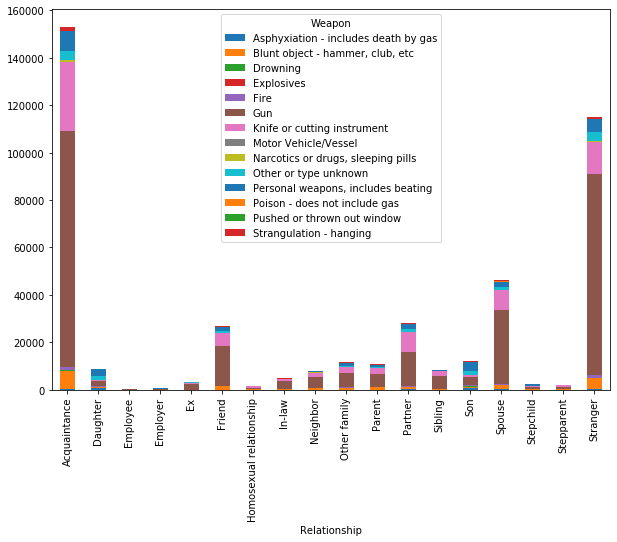

In [31]:
murder_relationship_df.plot.bar(stacked=True, figsize=(10,7))

# How does the rate of interracial murder compare to that of cross-racial murder?
* It is far more common for a murder to occur between an offender and victim of the same race than an offender and victim of a different race. Interracial murder was ~21% higher than that of cross-racial murder.
* This finding can into a larger issue of segregation between races as more interactions occur between people of the same race.
* <10% that occur are White/Black cross-racial.

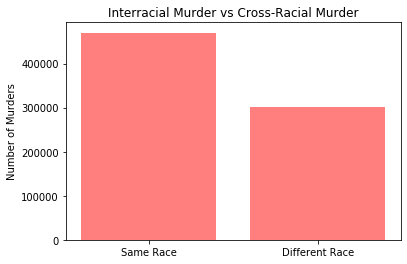

In [35]:
Race_df = pd.DataFrame(
    {'Victim Race': murder_df['VicRace'],
    'Offender Race': murder_df['OffRace']})
Same_race = 0
Diff_race = 0
x = 0
length = len(Race_df)

while x < length:
    if (Race_df['Victim Race'][x]) == (Race_df['Offender Race'][x]):
        Same_race = Same_race + 1
        x = x + 1
    else:
        Diff_race = Diff_race + 1
        x = x + 1
        
groups = [Same_race, Diff_race]
x_axis = np.arange(len(groups))
plt.bar(x_axis, groups, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Same Race", "Different Race"])
plt.title("Interracial Murder vs Cross-Racial Murder")
plt.ylabel("Number of Murders")

plt.show()

# How do the rates of gendered murder compare?

* Murders are committed far more often by a male than by a female.
* Males committed ~75% of all murdered recorded with ~67% of them being against another Male.
* The data also shows that if Females are going to commit murder it is against a male with 90% of their murders being such. 

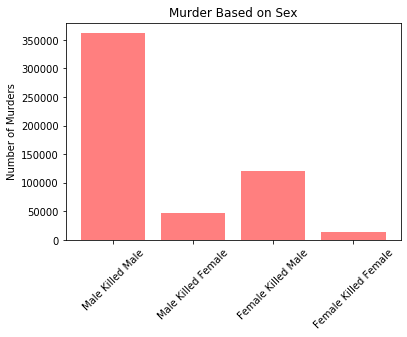

In [36]:
Gender_df = pd.DataFrame(
    {'Victim Sex': murder_df['VicSex'],
    'Offender Sex': murder_df['OffSex']})
Male_Male = 0
Male_Female = 0
Female_Male = 0
Female_Female = 0
x = 0
length = len(Gender_df)

while x < length:
        if (Gender_df['Victim Sex'][x]) == "Male":
            if (Gender_df['Offender Sex'][x]) == "Male":
                Male_Male = Male_Male + 1
                x = x + 1
            elif (Gender_df['Offender Sex'][x]) == "Female":
                Male_Female = Male_Female + 1
                x = x + 1
            else:
                x = x + 1
        elif (Gender_df['Victim Sex'][x]) == "Female":
            if (Gender_df['Offender Sex'][x]) == "Male":
                Female_Male = Female_Male + 1
                x = x + 1
            elif (Gender_df['Offender Sex'][x]) == "Female":
                Female_Female = Female_Female + 1
                x = x + 1
            else:
                x = x + 1
        else:
            x = x + 1

groups = [Male_Male, Male_Female, Female_Male, Female_Female]
x_axis = np.arange(len(groups))
plt.bar(x_axis, groups, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Male Killed Male", "Male Killed Female", "Female Killed Male", "Female Killed Female"], rotation=45)
plt.title("Murder Based on Sex")
plt.ylabel("Number of Murders")
plt.show()

# How do drugs and alcohol influence murder?

### Findings
* Arguments were by far the biggest cause of murders in this timeframe
* There aren't any indications that alcohol and drugs influenced murders caused by arguments
* Drugs and alcohol were the third highest cause of murder out of 16, which supports the hypothesis that drugs and alcohol do influence murder rates

In [37]:
murder_counts_groupby_circumstance = murder_df.groupby('Circumstance').agg('count')
murder_counts_groupby_circumstance

,ID,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,Month,...,OffEthnic,Weapon,Relationship,Subcircum,VicCount,OffCount,FileDate,fstate,MSA,Off_Age_Group
Circumstance,,,,,,,,,,,,,,,,,,,,,
Abortion,10,10,10,10,10,10,10,10,10,10,...,10,10,10,0,10,10,10,10,10,10
Arguments,217127,217127,217127,217127,217127,217127,217127,217127,217127,217127,...,217127,217127,217127,0,217127,217127,217113,217127,217127,217127
Arson,4630,4630,4630,4630,4630,4630,4630,4630,4630,4630,...,4630,4630,4630,0,4630,4630,4630,4630,4630,4630
Child killed by babysitter,1275,1275,1275,1275,1275,1275,1275,1275,1275,1275,...,1275,1275,1275,0,1275,1275,1275,1275,1275,1275
Drug & Alcohol Related,50055,50055,50055,50055,50055,50055,50055,50055,50055,50055,...,50055,50055,50055,0,50055,50055,49976,50055,50055,50055
Felon killed by police,16555,16555,16555,16555,16555,16555,16555,16555,16555,16555,...,16555,16555,16555,16530,16555,16555,16520,16555,16555,16555
Felon killed by private citizen,12725,12725,12725,12725,12725,12725,12725,12725,12725,12725,...,12725,12725,12725,12716,12725,12725,12646,12725,12725,12725
Gambling,1078,1078,1078,1078,1078,1078,1078,1078,1078,1078,...,1078,1078,1078,0,1078,1078,1078,1078,1078,1078
Gang Related,28891,28891,28891,28891,28891,28891,28891,28891,28891,28891,...,28891,28891,28891,0,28891,28891,28881,28891,28891,28891


In [38]:
murder_counts_series = murder_counts_groupby_circumstance['ID']
murder_counts_series_wo_other = murder_counts_series.drop(labels=['Other'])
murder_counts_series_wo_other

Circumstance
Abortion                                    10
Arguments                               217127
Arson                                     4630
Child killed by babysitter                1275
Drug & Alcohol Related                   50055
Felon killed by police                   16555
Felon killed by private citizen          12725
Gambling                                  1078
Gang Related                             28891
Institutional killings                    1094
Lovers triangle                          12073
Negligence                               10709
Prostitution and commercialized vice       614
Sex Offense                               5643
Sniper attack                              553
Theft                                    68198
Name: ID, dtype: int64

In [39]:
circumstance_count_map = {}

for index, value in murder_counts_series_wo_other.iteritems():
    circumstance_count_map[index] = value
    
x_axis = np.arange(len(circumstance_count_map.values()))

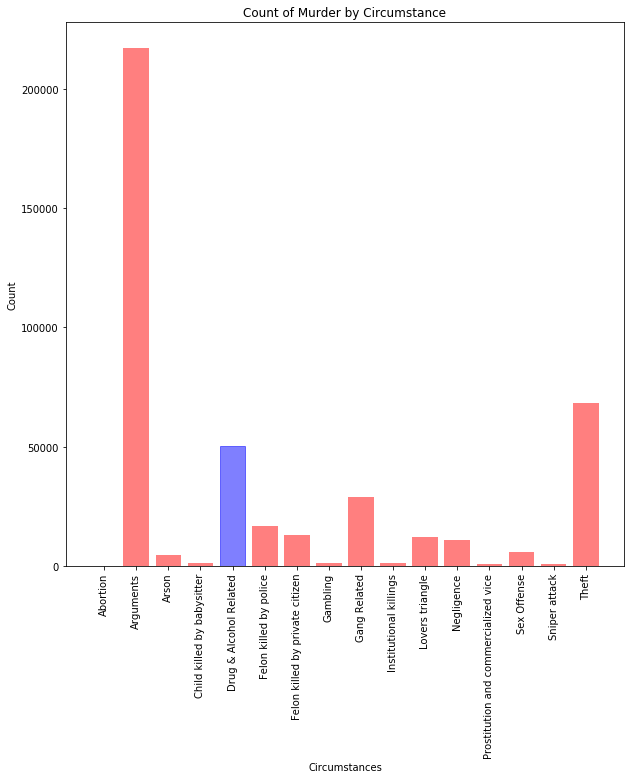

In [40]:
plt.figure(figsize=(10, 10))
circumstance_bar = plt.bar(x_axis, circumstance_count_map.values(), color='r', alpha=0.5, align="center")
circumstance_bar[4].set_color('b')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, circumstance_count_map.keys(), rotation=90)

plt.title("Count of Murder by Circumstance")
plt.xlabel("Circumstances")
plt.ylabel("Count")

plt.show()

# How often is rape involved in murder cases? Does race and location have any effects on the rate of rape-murder cases? Have there been any common weapons used in rape cases?

* Sex Offenses do not occur often in murder circumstances, outranked by drugs & alcohol, gang related crime and theft

In [41]:
circumstance_df = murder_df.groupby(['Circumstance']).size().reset_index(name='total by circ')
circumstance_df = circumstance_df.drop([12], axis=0)
total_circs = circumstance_df["total by circ"].sum()
circumstance_percentage = circumstance_df["total by circ"]/total_circs*100
circumstance_df["% of Total Circumstances"] = circumstance_percentage
circumstance_df

,Circumstance,total by circ,% of Total Circumstances
0,Abortion,10,0.002319
1,Arguments,217127,50.350625
2,Arson,4630,1.073673
3,Child killed by babysitter,1275,0.295666
4,Drug & Alcohol Related,50055,11.607495
5,Felon killed by police,16555,3.839019
6,Felon killed by private citizen,12725,2.950861
7,Gambling,1078,0.249983
8,Gang Related,28891,6.699673
9,Institutional killings,1094,0.253693


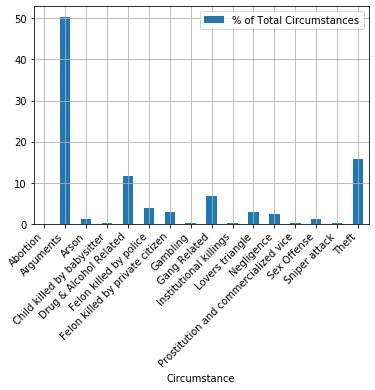

In [42]:
Circumstance = circumstance_df.index
circumstance_df.plot.bar('Circumstance','% of Total Circumstances')
plt.xticks(rotation=45, ha="right")
plt.grid()

# What is the rate of unsolved murder over time and location?
* The rate of unsolved murder was highest in the early 1990s.
* The rate dipped a lot until the early 2000s, which could tell us that there was a high effort to reduce crime rates and figure out what happened in murder cases in the 1990s.
* There are several peaks and valleys, which also could tell us that high effort to reduce crime rates comes and goes.
* California and New York had the highest rate of unsolved murder, which could be caused by the high populations.

In [43]:
unsolved_murder_df = murder_df.loc[murder_df['Solved'] == 'No', :]

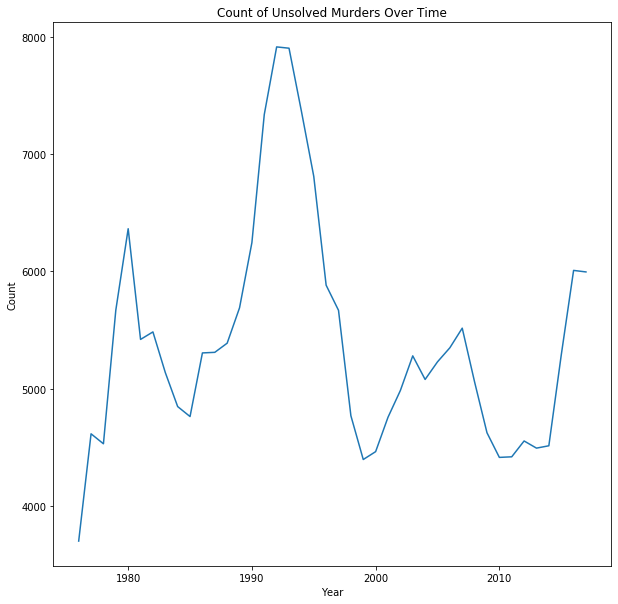

In [44]:
unsolved_murder_df_groupby_year_count = unsolved_murder_df.groupby('Year').agg('count')['ID']
x = unsolved_murder_df_groupby_year_count.index.to_list()
y = unsolved_murder_df_groupby_year_count.tolist()

plt.figure(figsize=(10,10))
plt.plot(x, y)
plt.title("Count of Unsolved Murders Over Time")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

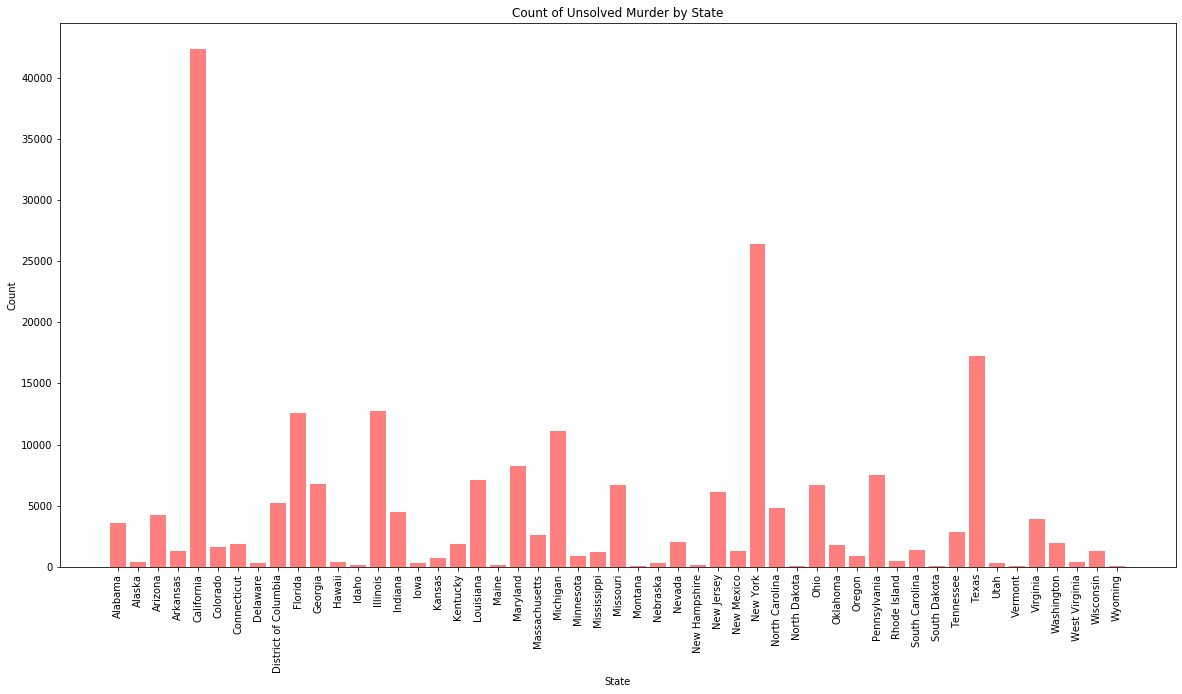

In [45]:
unsolved_murder_df_groupby_fstate_count = unsolved_murder_df.groupby('fstate').agg('count')['ID']

x_axis = np.arange(len(unsolved_murder_df_groupby_fstate_count.index.to_list()))
plt.figure(figsize=(20, 10))
plt.bar(x_axis, unsolved_murder_df_groupby_fstate_count.tolist(), color='r', alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, unsolved_murder_df_groupby_fstate_count.index.to_list(), rotation=90)

plt.title("Count of Unsolved Murder by State")
plt.xlabel("State")
plt.ylabel("Count")

plt.show()

# How does age correlate with Negligence cases?
* Negligence cases increased throughout age up to Young Adulthood and then decreased thereafter.
* This could be due to children and young adults having less experience with weaponry than older adults.

In [46]:
negligence_count = circumstance_count_map.get('Negligence')
print(f"Total number of Negligence cases: {negligence_count}")

Total number of Negligence cases: 10709


In [47]:
negligence_murder_df = murder_df.loc[murder_df['Circumstance'] == 'Negligence', :]

#Create age bins
neg_bins = [0, 3, 12, 17, 29, 44, 59, 998, 1000]

# Create the names for the bins
neg_group_names = ["Baby", "Child", "Teenager", "Young Adult", "Adult", "Middle Age", "Old Adult", "Unknown"]

negligence_murder_df.loc[:, "Off Age Group"] = pd.cut(negligence_murder_df.OffAge, bins=neg_bins, labels=neg_group_names)

/Users/nicholasmajeski/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/nicholasmajeski/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [48]:
age_group_counts = negligence_murder_df.groupby("Off Age Group").agg("count")

age_group_counts

,ID,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,Month,...,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,fstate,MSA,Off_Age_Group
Off Age Group,,,,,,,,,,,,,,,,,,,,,
Baby,6,6,6,6,6,6,6,6,6,6,...,6,6,6,0,6,6,6,6,6,6
Child,460,460,460,460,460,460,460,460,460,460,...,460,460,460,0,460,460,458,460,460,460
Teenager,1999,1999,1999,1999,1999,1999,1999,1999,1999,1999,...,1999,1999,1999,0,1999,1999,1997,1999,1999,1999
Young Adult,4437,4437,4437,4437,4437,4437,4437,4437,4437,4437,...,4437,4437,4437,0,4437,4437,4418,4437,4437,4437
Adult,2042,2042,2042,2042,2042,2042,2042,2042,2042,2042,...,2042,2042,2042,0,2042,2042,2030,2042,2042,2042
Middle Age,846,846,846,846,846,846,846,846,846,846,...,846,846,846,0,846,846,841,846,846,846
Old Adult,264,264,264,264,264,264,264,264,264,264,...,264,264,264,0,264,264,261,264,264,264
Unknown,655,655,655,655,655,655,655,655,655,655,...,655,655,655,0,655,655,638,655,655,655


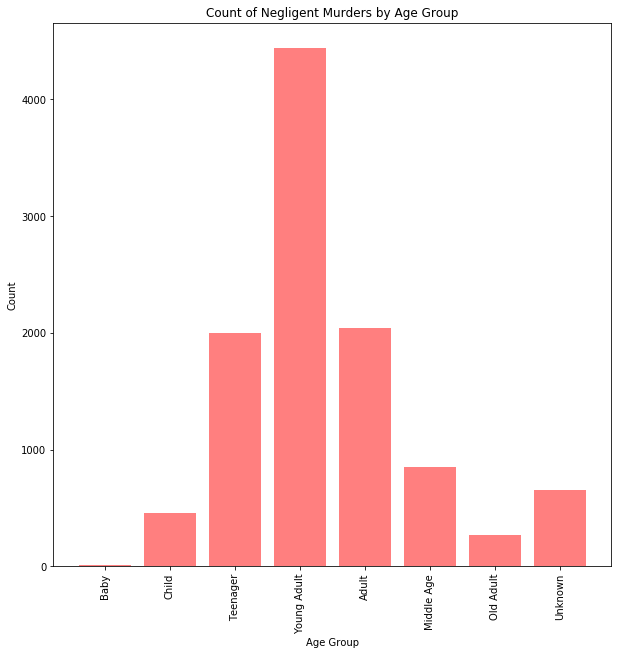

In [49]:
x_axis = np.arange(len(neg_group_names))

age_group_count_list = []
for index, value in age_group_counts['ID'].iteritems():
    age_group_count_list.append(value)

plt.figure(figsize=(10, 10))
plt.bar(x_axis, age_group_count_list, color='r', alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, neg_group_names, rotation=90)

plt.title("Count of Negligent Murders by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")

plt.show()